<a href="https://colab.research.google.com/github/norflin321/ml/blob/main/txt2img_diffusers_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
Token indices sequence length is longer than the specified maximum sequence length for this model (147 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', megapixel, prophoto rgb, halfrear lighting, natural lighting

  0%|          | 0/50 [00:00<?, ?it/s]

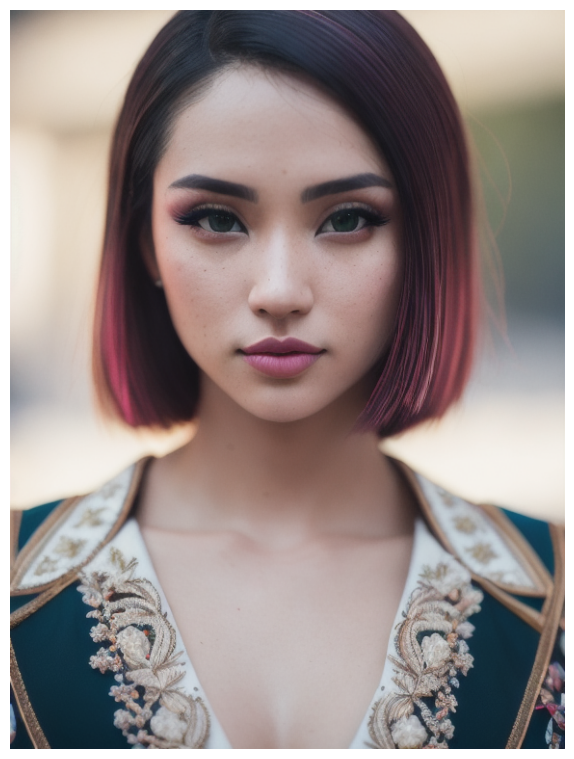

seed: 64960


In [12]:
!pip install transformers diffusers accelerate

import torch
from diffusers import StableDiffusionPipeline
from matplotlib import pyplot as plt
import datetime

# diffusers docs: https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/text2img#texttoimage-generation

# model_id = "dreamlike-art/dreamlike-diffusion-1.0"
model_id = "XpucT/Deliberate"

# hyperparameters
width, height = 576, 768 # The width and height in pixels of the generated image
steps = 50 # The number of denoising steps. More denoising steps usually lead to a higher quality image at the expense of slower inference.
guidance = 7.5 # Higher guidance scale encourages to generate images that are closely linked to the text prompt, usually at the expense of lower image quality.
images_to_generate = 1 # The number of images to generate per prompt
seed = None # set seed of previously generated image to reproduce it

# prompts
prompt = "women, hyper-detailed, beautifully color-coded, insane details, intricate details, beautifully color graded, Unreal Engine 5, Cinematic, Color Grading, Editorial Photography, Photography, Photoshoot, Shot on 22mm lens, Depth of Field, Tilt Blur, Shutter Speed 1/1000, F/22, White Balance, 32k, Super-Resolution, Megapixel, ProPhoto RGB, Halfrear Lighting,Natural Lighting, Incandescent,Moody Lighting, Cinematic Lighting, Studio Lighting, Soft Lighting, no watermark, Contre-Jour, Edge Lighting, Accent Lighting, insanely detailed and intricate, hypermaximalist, elegant, hyper realistic, super detailed, dynamic pose, photography, 8"
negative_prompt = "easynegative, (low quality, worst quality:1.4), bad anatomy, bad composition, out of frame, duplicate, watermark, signature, text, deformed, cripple, ugly, additional arms, additional legs, additional head, two heads, multiple people, group of people"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
pipe = pipe.to(device)

for _ in range(images_to_generate):
    current_seed = seed or torch.randint(0, int(1e5), size=(1, 1))[0].item()
    generator = torch.Generator().manual_seed(int(current_seed))
    img = pipe(prompt=prompt, negative_prompt=negative_prompt, width=width, height=height, num_inference_steps=steps, guidance_scale=guidance, generator=generator).images[0]
    time_now = datetime.datetime.now().strftime("%y.%m.%d_%H:%M:%S")
    img.save(f"./{time_now}_{current_seed}.jpg")
    plt.figure(figsize=(width/80, height/80))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("seed:", current_seed)

# TODO: implement img2img pipeline for upscale and GFPGAN (https://huggingface.co/TencentARC/GFPGANv1)
